In [30]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
#create arrays of random combos
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180,180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
#create the list of arrays
coordinates = list(lats_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-7.211017427134507 -100.45949676248296
-23.50370630189255 -131.68486245294758
-0.20026257895273147 148.36019457347015
-3.1286975571618996 123.54258835258617
-47.577210051409004 -51.849188705801396
79.53478193802246 -124.47071393438654
42.64973524203475 -56.153164905368286
82.77152716054914 -38.61586860510337
65.91096866114196 43.73835718052197
42.41849833595148 -124.06503730594092
58.32092979895367 173.6429594292146
-31.217332231778023 -74.29423443759184
3.6619897839506024 -24.152032080368713
4.963523202567117 -23.003524288592274
15.205549411268734 131.93127627288732
-22.516141940537835 -73.82056888939799
28.523978458251847 78.47612721369501
-36.927000438666454 1.620420280035603
13.70138007362668 120.96480533115562
-48.988468387430345 -74.78414558880057
19.310764295062043 -47.84047679051662
4.932478878003167 -138.41429186587044
12.762508737329696 7.024658523012704
-72.88752510423762 22.662221979093573
-63.88640642891535 -157.56542980169147
64.81510233537398 -67.95886843889588
9.0116219

14.295739499021508 -31.379217830563277
50.897238925170114 -168.28343701810937
18.01295089882761 -96.60378438933901
74.67530940706422 170.61032808991786
22.20646106551058 -62.768424569353016
59.84861591139233 -54.61608032426045
36.74462284279852 -40.42252774433797
44.4751465867584 17.105754065851016
-76.24531080372326 167.82673933087966
-81.66191420490688 -73.39134759720552
-38.01250896901154 -164.9646640811542
-4.100571498171163 134.64102571882722
-74.3215782671369 167.90842152991928
-12.609379135591809 -46.82200639512914
67.90362095392138 -63.98486634654202
76.84600430955766 -122.88222262951405
-33.64321386258078 165.84240651161542
27.566724049877365 177.47878061094605
-12.504949308960661 -56.82560977534871
49.008537606043774 -5.6463427335521885
-76.56581364184751 53.8527769455537
82.08245160927905 -99.07449513071276
12.575420544396238 -65.98174725894864
-37.502798444876376 67.00357235209125
-24.743896971178003 -129.3218961801764
-64.2411790522518 6.32439871588528
60.807731242317004 2

-25.43456787507077 156.05243908217523
30.533692391399228 -168.73144566152376
71.21974699938946 -15.213275584143531
-42.34821363521529 -144.04617135528756
39.258258287374844 134.68919478827024
26.041295134732493 163.60693906368448
-18.149319913020364 -175.86057432910445
-83.88535138449069 -96.02903320128094
-37.510657168032644 72.22770750389898
-35.081816316209554 44.671377172320206
-43.17944713758198 -35.02137901292474
-61.05877169793154 28.423690332199527
-33.14106413379029 161.11059859693847
-60.94100309882597 70.31034560734062
11.119964818325158 -146.1925484281006
61.00697156513846 125.4044745806799


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

626

In [7]:
cities

['puerto ayora',
 'rikitea',
 'lorengau',
 'kendari',
 'mar del plata',
 'tuktoyaktuk',
 'saint-pierre',
 'tasiilaq',
 'kamenka',
 'grants pass',
 'beringovskiy',
 'ovalle',
 'sao filipe',
 'bubaque',
 'san policarpo',
 'antofagasta',
 'sambhal',
 'saldanha',
 'talaga',
 'coihaique',
 'bathsheba',
 'atuona',
 'kaura namoda',
 'bredasdorp',
 'mataura',
 'iqaluit',
 'panacan',
 'albany',
 'kapaa',
 'mys shmidta',
 'bulolo',
 'illoqqortoormiut',
 'dikson',
 'manggar',
 'luderitz',
 'isangel',
 'saint-philippe',
 'hithadhoo',
 'malanje',
 'faanui',
 'salalah',
 'carolina',
 'matagami',
 'manzil tamim',
 'ushuaia',
 'taolanaro',
 'samarai',
 'namibe',
 'shache',
 'hun',
 'hermanus',
 'punta arenas',
 'kaitangata',
 'aquin',
 'richards bay',
 'cape town',
 'busselton',
 'esperance',
 'new norfolk',
 'tarabha',
 'jalu',
 'georgetown',
 'moree',
 'carnarvon',
 'le port',
 'yellowknife',
 'bonfim',
 'abnub',
 'sentyabrskiy',
 'butaritari',
 'belushya guba',
 'ornskoldsvik',
 'bluff',
 'providen

In [8]:
#starting base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

In [10]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | kendari
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | saint-pierre
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | kamenka
Processing Record 10 of Set 1 | grants pass
Processing Record 11 of Set 1 | beringovskiy
Processing Record 12 of Set 1 | ovalle
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | bubaque
Processing Record 15 of Set 1 | san policarpo
Processing Record 16 of Set 1 | antofagasta
Processing Record 17 of Set 1 | sambhal
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | talaga
Processing Record 20 of Set 1 | coihaique
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 | kaura namoda
Processing Record 24 of Set 1 | bredas

Processing Record 43 of Set 4 | bato
Processing Record 44 of Set 4 | panzhihua
Processing Record 45 of Set 4 | kollam
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | auch
Processing Record 48 of Set 4 | sragen
Processing Record 49 of Set 4 | la ciotat
Processing Record 50 of Set 4 | yozgat
Processing Record 1 of Set 5 | amapa
Processing Record 2 of Set 5 | mayor pablo lagerenza
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | marang
Processing Record 6 of Set 5 | pangoa
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | kushiro
Processing Record 9 of Set 5 | borujan
City not found. Skipping...
Processing Record 10 of Set 5 | ribeira grande
Processing Record 11 of Set 5 | vanimo
Processing Record 12 of Set 5 | harlingen
Processing Record 13 of Set 5 | eucaliptus
Processing Record 14 of Set 5 | myskhako
Processing Record 15 of Set 5 | mount gambier
Processing Record 16 of Set 5 | lebu
Pr

Processing Record 34 of Set 8 | udachnyy
Processing Record 35 of Set 8 | urumqi
Processing Record 36 of Set 8 | blackwater
Processing Record 37 of Set 8 | soyo
Processing Record 38 of Set 8 | tonneins
Processing Record 39 of Set 8 | solnechnyy
Processing Record 40 of Set 8 | oda
Processing Record 41 of Set 8 | griffith
Processing Record 42 of Set 8 | ternate
Processing Record 43 of Set 8 | manaure
Processing Record 44 of Set 8 | capao da canoa
Processing Record 45 of Set 8 | la ronge
Processing Record 46 of Set 8 | gangotri
City not found. Skipping...
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | airai
Processing Record 49 of Set 8 | anloga
Processing Record 50 of Set 8 | lalsk
Processing Record 1 of Set 9 | taltal
Processing Record 2 of Set 9 | kuche
City not found. Skipping...
Processing Record 3 of Set 9 | sur
Processing Record 4 of Set 9 | touros
Processing Record 5 of Set 9 | vidim
Processing Record 6 of Set 9 | port keats
Processing Record 7 of Set 

Processing Record 22 of Set 12 | seka
Processing Record 23 of Set 12 | los llanos de aridane
Processing Record 24 of Set 12 | yanzhou
Processing Record 25 of Set 12 | bermejo
Processing Record 26 of Set 12 | puri
Processing Record 27 of Set 12 | paidha
Processing Record 28 of Set 12 | kathu
Processing Record 29 of Set 12 | outjo
Processing Record 30 of Set 12 | san marcos
Processing Record 31 of Set 12 | neepawa
Processing Record 32 of Set 12 | buraydah
Processing Record 33 of Set 12 | corinto
Processing Record 34 of Set 12 | naliya
Processing Record 35 of Set 12 | petauke
Processing Record 36 of Set 12 | byron bay
Processing Record 37 of Set 12 | sadiqabad
Processing Record 38 of Set 12 | skjervoy
Processing Record 39 of Set 12 | elizabeth city
Processing Record 40 of Set 12 | chinsali
Processing Record 41 of Set 12 | konevo
Processing Record 42 of Set 12 | meulaboh
Processing Record 43 of Set 12 | ust-nera
Processing Record 44 of Set 12 | naftah
City not found. Skipping...
Processing

In [12]:
len(city_data)

575

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,75.20,73,75,17.22,EC,2020-10-31 17:10:15
1,Rikitea,-23.12,-134.97,74.95,71,7,7.65,PF,2020-10-31 17:07:31
2,Lorengau,-2.02,147.27,80.83,76,15,4.92,PG,2020-10-31 17:10:18
3,Kendari,-3.94,122.50,75.69,91,96,3.83,ID,2020-10-31 17:11:21
4,Mar Del Plata,-38.00,-57.56,71.60,37,0,8.05,AR,2020-10-31 17:11:19
5,Tuktoyaktuk,69.45,-133.04,-4.00,83,40,4.70,CA,2020-10-31 17:10:20
6,Saint-Pierre,-21.34,55.48,68.00,64,0,5.82,RE,2020-10-31 17:11:59
7,Tasiilaq,65.61,-37.64,32.00,96,75,4.70,GL,2020-10-31 17:11:59
8,Kamenka,51.32,42.77,50.04,93,100,9.55,RU,2020-10-31 17:11:59
9,Grants Pass,42.44,-123.33,48.20,81,1,1.61,US,2020-10-31 17:11:59


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2020-10-31 17:10:15,-0.74,-90.35,75.20,73,75,17.22
1,Rikitea,PF,2020-10-31 17:07:31,-23.12,-134.97,74.95,71,7,7.65
2,Lorengau,PG,2020-10-31 17:10:18,-2.02,147.27,80.83,76,15,4.92
3,Kendari,ID,2020-10-31 17:11:21,-3.94,122.50,75.69,91,96,3.83
4,Mar Del Plata,AR,2020-10-31 17:11:19,-38.00,-57.56,71.60,37,0,8.05


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

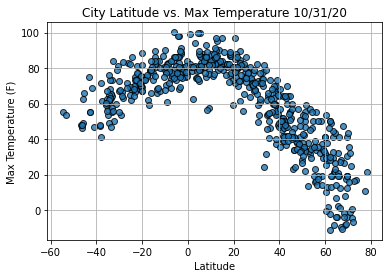

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

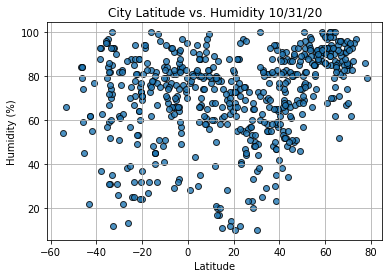

In [21]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

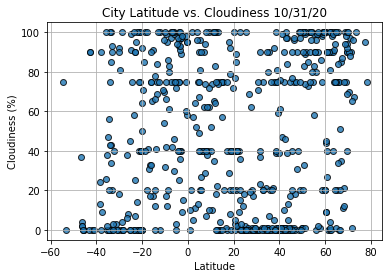

In [22]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

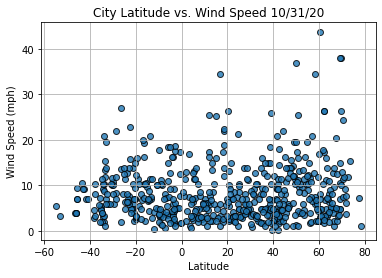

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                      Bubaque
Country                        GW
Date          2020-10-31 17:11:59
Lat                         11.28
Lng                        -15.83
Max Temp                    85.73
Humidity                       60
Cloudiness                     65
Wind Speed                   6.08
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
570     True
571    False
572     True
573    False
574     True
Name: Lat, Length: 575, dtype: bool

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

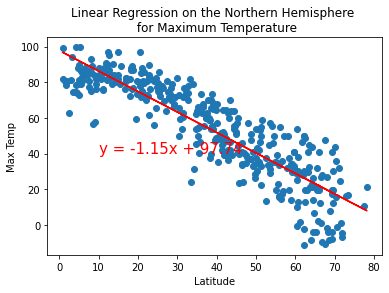

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature')

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

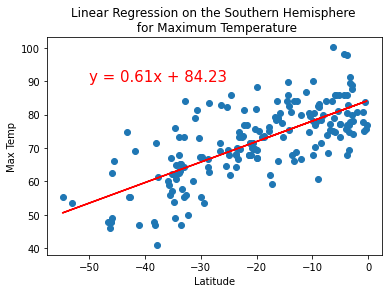

In [40]:
# Linear regression on the South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature')

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

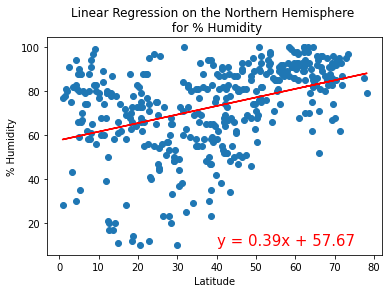

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity')

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

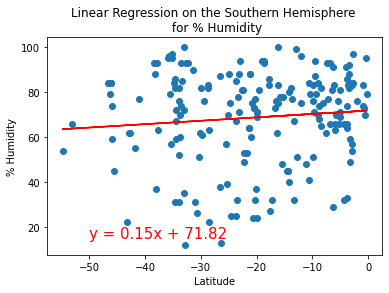

In [43]:
# Linear regression on the South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.title('Linear Regression on the Southern Hemisphere \n for % Humidity')

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

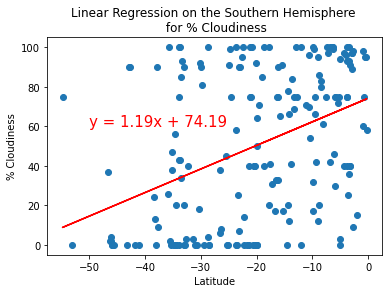

In [44]:
# Linear regression on the South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.title('Linear Regression on the Southern Hemisphere \n for % Cloudiness')

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

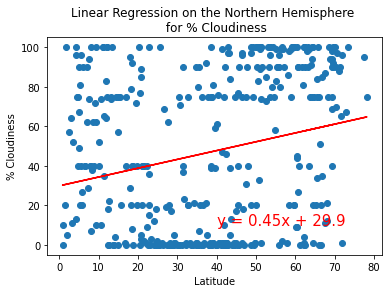

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness')

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

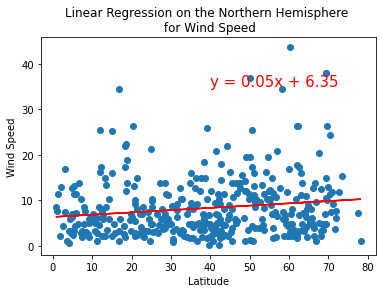

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed')

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

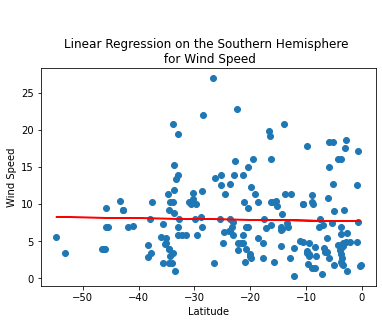

In [48]:
# Linear regression on the South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed')

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))